## Experiment Design

This notebook aims to compare different pivot rules for randomly generated linear programs that *always have the origin point as the starting solution*.  
To achieve this, I will consider three main categories of problems:

### **1. Balanced Problems (m = n)**  
These are square linear programs where the number of constraints equals the number of variables. I will generate instances in increments of 5, covering the following sizes:

- (5×5), (10×10), (15×15), (20×20), (25×25), (30×30), (35×35), (40×40), (45×45), (50×50)
- (55×55), (60×60), (65×65), (70×70), (75×75), (80×80), (85×85), (90×90), (95×95), (100×100)

### **2. Wide Problems (m < n, n = 2m)**  
These problems have twice as many variables as constraints, representing underdetermined systems. The chosen sizes are:

- (5×10), (10×20), (15×30), (20×40), (25×50), (30×60), (35×70), (40×80), (45×90), (50×100)

### **3. Tall Problems (m > n, m = 2n)**  
These problems have twice as many constraints as variables, representing overdetermined systems. The chosen sizes are:

- (10×5), (20×10), (30×15), (40×20), (50×25), (60×30), (70×35), (80×40), (90×45), (100×50)

## **Number of Instances per Category**  
To ensure sufficient variation across different problem sizes, I will generate 250 problems per subcategory. This is because I also want to make the running time feasible.

This results in a total of **20,000 randomly generated problems** for the experiment.

## **Metrics for Comparison**  
To evaluate the performance of different pivot rules, I will measure:

1. **Number of iterations (pivot steps) taken** to reach optimality
2. **Computation time** for each problem instance

## Imports, setup and problems creation

In [1]:

import random
import os
import sys
from dense_lp_generator import DenseLPGenerator
from simplex_solver import SimplexSolver
from input_parser import LPParser

# IMPORTANT: Set random seed for reproducibility.
random.seed(42)

balanced_sizes = [(i, i) for i in range(5, 101, 5)]
wide_sizes = [(i, 2*i) for i in range(5, 51, 5)]
tall_sizes = [(2*i, i) for i in range(5, 51, 5)]
root_folder = os.path.join('problems', 'problems_pivot_rules_one_phase_only')
balanced_folder = os.path.join(root_folder, 'balanced_problems')
wide_folder = os.path.join(root_folder, 'wide_problems')
tall_folder = os.path.join(root_folder, 'tall_problems')
random_dense_gen = DenseLPGenerator(precision = 4)

if not os.path.exists(root_folder):
    os.mkdir(root_folder)

if not os.path.exists(balanced_folder):
    os.mkdir(balanced_folder)
    
if not os.path.exists(wide_folder):
    os.mkdir(wide_folder)
    
if not os.path.exists(tall_folder):
    os.mkdir(tall_folder)

### Generating the balanced problems

In [2]:
for (x, y) in balanced_sizes:
    current_size_folder = os.path.join(balanced_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

### Generating the wide problems

In [3]:
for (x, y) in wide_sizes:
    current_size_folder = os.path.join(wide_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

### Generating the tall problems

In [4]:
for (x, y) in tall_sizes:
    current_size_folder = os.path.join(tall_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

## The first experiment - Running time of Dantzig
This experiment aims to plot the average time of Dantzig's pivot rule for all problem sizes, in order to establish a feasible upper bound for our problem sizes, i.e. to be able to run the experiment in a timely manner

In [2]:
import json
import time
from tqdm import tqdm
dantzig_solver = SimplexSolver(pivot_rule = 'Dantzig')
lp_parser = LPParser()

### Running Dantzig on balanced problems

In [4]:
for (x, y) in balanced_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x5.


100%|██████████| 250/250 [00:00<00:00, 1774.08it/s]


Done with size 5x5. Results saved.
Currently solving for size 10x10.


100%|██████████| 250/250 [00:00<00:00, 359.20it/s]


Done with size 10x10. Results saved.
Currently solving for size 15x15.


100%|██████████| 250/250 [00:02<00:00, 101.10it/s]


Done with size 15x15. Results saved.
Currently solving for size 20x20.


100%|██████████| 250/250 [00:07<00:00, 33.79it/s]


Done with size 20x20. Results saved.
Currently solving for size 25x25.


100%|██████████| 250/250 [00:15<00:00, 15.64it/s]


Done with size 25x25. Results saved.
Currently solving for size 30x30.


100%|██████████| 250/250 [00:30<00:00,  8.28it/s]


Done with size 30x30. Results saved.
Currently solving for size 35x35.


100%|██████████| 250/250 [00:52<00:00,  4.76it/s]


Done with size 35x35. Results saved.
Currently solving for size 40x40.


100%|██████████| 250/250 [01:24<00:00,  2.97it/s]


Done with size 40x40. Results saved.
Currently solving for size 45x45.


100%|██████████| 250/250 [02:22<00:00,  1.75it/s]


Done with size 45x45. Results saved.
Currently solving for size 50x50.


100%|██████████| 250/250 [03:24<00:00,  1.23it/s]


Done with size 50x50. Results saved.
Currently solving for size 55x55.


100%|██████████| 250/250 [05:09<00:00,  1.24s/it]


Done with size 55x55. Results saved.
Currently solving for size 60x60.


100%|██████████| 250/250 [07:44<00:00,  1.86s/it]


Done with size 60x60. Results saved.
Currently solving for size 65x65.


100%|██████████| 250/250 [11:05<00:00,  2.66s/it]


Done with size 65x65. Results saved.
Currently solving for size 70x70.


100%|██████████| 250/250 [14:56<00:00,  3.59s/it]


Done with size 70x70. Results saved.
Currently solving for size 75x75.


100%|██████████| 250/250 [20:39<00:00,  4.96s/it]


Done with size 75x75. Results saved.
Currently solving for size 80x80.


100%|██████████| 250/250 [27:23<00:00,  6.58s/it]


Done with size 80x80. Results saved.
Currently solving for size 85x85.


100%|██████████| 250/250 [36:10<00:00,  8.68s/it]


Done with size 85x85. Results saved.
Currently solving for size 90x90.


100%|██████████| 250/250 [48:49<00:00, 11.72s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [1:00:27<00:00, 14.51s/it]


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [1:19:17<00:00, 19.03s/it]

Done with size 100x100. Results saved.


### Running time of Bland

In [5]:
bland = SimplexSolver(pivot_rule = 'Bland')


In [6]:
for (x, y) in balanced_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x5.


100%|██████████| 250/250 [00:00<00:00, 2040.39it/s]


Done with size 5x5. Results saved.
Currently solving for size 10x10.


100%|██████████| 250/250 [00:00<00:00, 362.15it/s]


Done with size 10x10. Results saved.
Currently solving for size 15x15.


100%|██████████| 250/250 [00:02<00:00, 102.80it/s]


Done with size 15x15. Results saved.
Currently solving for size 20x20.


100%|██████████| 250/250 [00:06<00:00, 38.93it/s]


Done with size 20x20. Results saved.
Currently solving for size 25x25.


100%|██████████| 250/250 [00:14<00:00, 17.30it/s]


Done with size 25x25. Results saved.
Currently solving for size 30x30.


100%|██████████| 250/250 [00:28<00:00,  8.85it/s]


Done with size 30x30. Results saved.
Currently solving for size 35x35.


100%|██████████| 250/250 [00:50<00:00,  4.96it/s]


Done with size 35x35. Results saved.
Currently solving for size 40x40.


100%|██████████| 250/250 [01:22<00:00,  3.04it/s]


Done with size 40x40. Results saved.
Currently solving for size 45x45.


100%|██████████| 250/250 [02:21<00:00,  1.77it/s]


Done with size 45x45. Results saved.
Currently solving for size 50x50.


100%|██████████| 250/250 [03:22<00:00,  1.24it/s]


Done with size 50x50. Results saved.
Currently solving for size 55x55.


100%|██████████| 250/250 [05:07<00:00,  1.23s/it]


Done with size 55x55. Results saved.
Currently solving for size 60x60.


100%|██████████| 250/250 [07:44<00:00,  1.86s/it]


Done with size 60x60. Results saved.
Currently solving for size 65x65.


100%|██████████| 250/250 [11:07<00:00,  2.67s/it]


Done with size 65x65. Results saved.
Currently solving for size 70x70.


100%|██████████| 250/250 [14:52<00:00,  3.57s/it]


Done with size 70x70. Results saved.
Currently solving for size 75x75.


100%|██████████| 250/250 [20:31<00:00,  4.92s/it]


Done with size 75x75. Results saved.
Currently solving for size 80x80.


100%|██████████| 250/250 [27:13<00:00,  6.53s/it]


Done with size 80x80. Results saved.
Currently solving for size 85x85.


100%|██████████| 250/250 [36:04<00:00,  8.66s/it]


Done with size 85x85. Results saved.
Currently solving for size 90x90.


100%|██████████| 250/250 [48:40<00:00, 11.68s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [1:00:11<00:00, 14.45s/it]


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [1:19:15<00:00, 19.02s/it]

Done with size 100x100. Results saved.


### Running time of Random

In [7]:
random = SimplexSolver(pivot_rule = 'Random')

In [8]:
for (x, y) in balanced_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x5.


100%|██████████| 250/250 [00:00<00:00, 2055.51it/s]


Done with size 5x5. Results saved.
Currently solving for size 10x10.


100%|██████████| 250/250 [00:00<00:00, 355.33it/s]


Done with size 10x10. Results saved.
Currently solving for size 15x15.


100%|██████████| 250/250 [00:02<00:00, 100.82it/s]


Done with size 15x15. Results saved.
Currently solving for size 20x20.


100%|██████████| 250/250 [00:06<00:00, 38.37it/s]


Done with size 20x20. Results saved.
Currently solving for size 25x25.


100%|██████████| 250/250 [00:14<00:00, 17.24it/s]


Done with size 25x25. Results saved.
Currently solving for size 30x30.


100%|██████████| 250/250 [00:28<00:00,  8.83it/s]


Done with size 30x30. Results saved.
Currently solving for size 35x35.


100%|██████████| 250/250 [00:50<00:00,  4.96it/s]


Done with size 35x35. Results saved.
Currently solving for size 40x40.


100%|██████████| 250/250 [01:22<00:00,  3.04it/s]


Done with size 40x40. Results saved.
Currently solving for size 45x45.


100%|██████████| 250/250 [02:21<00:00,  1.77it/s]


Done with size 45x45. Results saved.
Currently solving for size 50x50.


100%|██████████| 250/250 [03:21<00:00,  1.24it/s]


Done with size 50x50. Results saved.
Currently solving for size 55x55.


100%|██████████| 250/250 [05:06<00:00,  1.23s/it]


Done with size 55x55. Results saved.
Currently solving for size 60x60.


100%|██████████| 250/250 [07:40<00:00,  1.84s/it]


Done with size 60x60. Results saved.
Currently solving for size 65x65.


100%|██████████| 250/250 [11:01<00:00,  2.65s/it]


Done with size 65x65. Results saved.
Currently solving for size 70x70.


100%|██████████| 250/250 [14:46<00:00,  3.55s/it]


Done with size 70x70. Results saved.
Currently solving for size 75x75.


 90%|█████████ | 225/250 [18:39<02:04,  4.97s/it]


KeyboardInterrupt: 

### Plot of running time of Dantzig

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


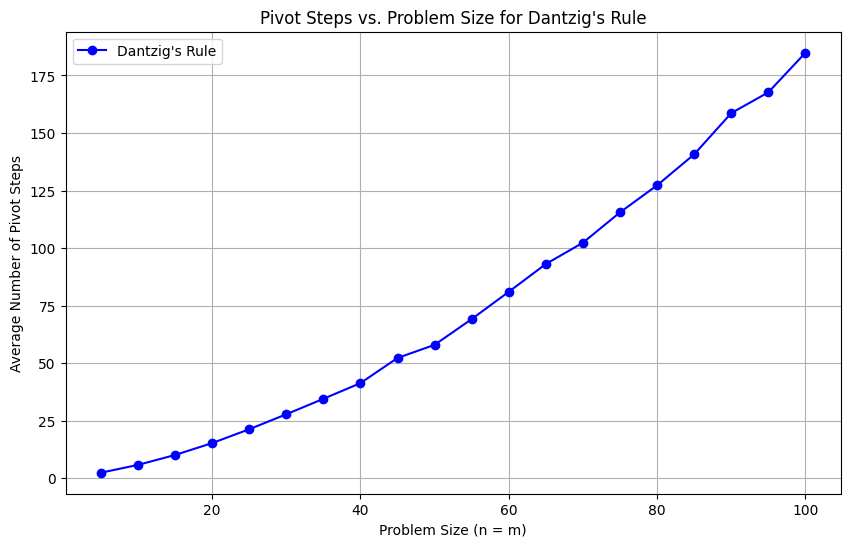

In [ ]:
import matplotlib.pyplot as plt

# Store results for plotting
sizes = []
avg_pivot_steps = []

# Loop through each problem size folder (5x5, 10x10, ..., 100x100)
for size in range(5, 101, 5):
    folder_name = f"{size}x{size}"
    file_path = os.path.join(balanced_folder, folder_name, "dantzig_results.json")

    if not os.path.exists(file_path):
        print(f"Skipping {folder_name}, file not found.")
        continue

    # Load JSON results
    with open(file_path, "r") as f:
        results = json.load(f)

    # Extract pivot steps from all instances
    pivot_steps = [results[f"{i}.lp"]["num_pivot_steps"] for i in range(1, 251)]

    # Compute average pivot steps
    avg_pivot = sum(pivot_steps) / len(pivot_steps)
    
    # Store results for plotting
    sizes.append(size)
    avg_pivot_steps.append(avg_pivot)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, avg_pivot_steps, marker="o", linestyle="-", color="b", label="Dantzig's Rule")

plt.xlabel("Problem Size (n = m)")
plt.ylabel("Average Number of Pivot Steps")
plt.title("Pivot Steps vs. Problem Size for Dantzig's Rule")
plt.legend()
plt.grid(True)
plt.show()